## Book Recommendations 📚

<b> About this file </b>

Creation of a recommender system (based on the review score) using data from books, from data acquisition to the creation of the Machine Learning model, in addition to creating a simulator to make the experience more intuitive.

- Exploratory Data Analysis (EDA)
- Machine Learning Model Creation (Unsupervised Learning)
- Understanding the algorithm (manual calculation)
- A report with book cover photos to illustrate the recommendation system

_______________



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Pandas
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',50)

# Matplotlib
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('seaborn-darkgrid')

_______
#### Preparing the dataset
____

In [2]:
books =pd.read_csv('Books2.csv', encoding = 'utf-8')
ratings =pd.read_csv('Ratings.csv')
users =pd.read_csv('Users.csv')

books.shape, ratings.shape, users.shape

((271282, 8), (1149780, 3), (278858, 3))

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271282 entries, 0 to 271281
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271282 non-null  object 
 1   Book-Title           227373 non-null  object 
 2   Book-Author          227372 non-null  object 
 3   Year-Of-Publication  227373 non-null  float64
 4   Publisher            227371 non-null  object 
 5   Image-URL-S          227373 non-null  object 
 6   Image-URL-M          227373 non-null  object 
 7   Image-URL-L          227373 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [9]:
# Transforming in 1 dataframe
df = books.merge(ratings, how = 'inner', on = 'ISBN')

In [10]:
df = df.merge(users, how = 'inner', on = 'User-ID')

In [11]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897620 entries, 0 to 897619
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 897620 non-null  object 
 1   Book-Title           897620 non-null  object 
 2   Book-Author          897619 non-null  object 
 3   Year-Of-Publication  897620 non-null  float64
 4   Publisher            897618 non-null  object 
 5   Image-URL-S          897620 non-null  object 
 6   Image-URL-M          897620 non-null  object 
 7   Image-URL-L          897620 non-null  object 
 8   User-ID              897620 non-null  int64  
 9   Book-Rating          897620 non-null  int64  
 10  Location             897620 non-null  object 
 11  Age                  652867 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 89.0+ MB


In [13]:
# Treating Year of Publication
for index in df[df['Year-Of-Publication'] == 'DK Publishing Inc'].index:
    for i in range(7, 2,-1):
        df.iloc[index,i] = df.iloc[index,i-1]

    df.iloc[index,1] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
    df.iloc[index,2] = 'Michael Teitelbaum'


In [14]:
for index in df[df['Year-Of-Publication'] == 'Gallimard'].index:
    for i in range(7, 2,-1):
        df.iloc[index,i] = df.iloc[index,i-1]

    df.iloc[index,1] = 'Peuple Du Ciel Suivi de les Bergers'
    df.iloc[index,2] = 'Jean-Marie Gustave Le Clezio'

In [15]:
# Converting Year of Publication
df['Year-Of-Publication'] = pd.to_numeric(df['Year-Of-Publication'])

In [16]:
df['Location'].head()

0    stockton, california, usa
1     timmins, ontario, canada
2     timmins, ontario, canada
3     timmins, ontario, canada
4     timmins, ontario, canada
Name: Location, dtype: object

In [17]:
def extractCountry (region):
    register = region.split(',')[-1].title()
    return register

df['Country'] = df['Location'].apply(extractCountry)

___
#### Data Visualization and EDA
____

In [18]:
df.describe()

,Year-Of-Publication,User-ID,Book-Rating,Age
count,897620.000000,897620.000000,897620.000000,652867.000000
mean,1965.763589,140246.027864,2.859872,37.556302
std,241.030835,80427.543846,3.859066,14.152744
min,0.000000,2.000000,0.000000,0.000000
25%,1991.000000,70222.000000,0.000000,28.000000
50%,1997.000000,140272.000000,0.000000,35.000000
75%,2001.000000,210959.000000,7.000000,46.000000
max,2050.000000,278854.000000,10.000000,244.000000


In [19]:
df = df.loc[df['Book-Rating'] > 0]
df.describe()

,Year-Of-Publication,User-ID,Book-Rating,Age
count,336597.000000,336597.000000,336597.000000,235010.000000
mean,1963.310805,135961.495694,7.626562,37.059751
std,252.214378,80502.906830,1.833243,13.776827
min,0.000000,8.000000,1.000000,0.000000
25%,1992.000000,67530.000000,7.000000,28.000000
50%,1997.000000,133571.000000,8.000000,35.000000
75%,2001.000000,206249.000000,9.000000,46.000000
max,2050.000000,278854.000000,10.000000,244.000000


In [20]:
# Assumption - All the books that had a year of publication greater than 2022 were replaced by 2022
df['Year-Of-Publication'].loc[df['Year-Of-Publication']> 2022] = 2022

In [21]:
# Assumption - All nulls were replaced by zero
df['Age'].fillna(0, inplace = True)

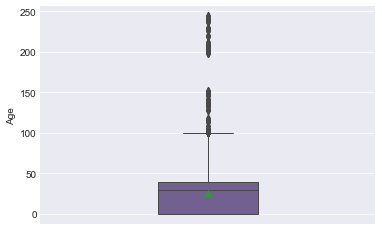

In [22]:
fig = plt.figure(figsize = (6,4))
sns.boxplot(data = df, y = 'Age', showmeans = True, saturation= 0.75, linewidth=1, width =0.3, color = '#705898');

In [23]:
# Assumption - All ages greater than 115 were replaced by 100
df['Age'].loc[df['Age']> 115] = 100

In [24]:
analysis = df.groupby(by=['Book-Title']).agg(
    Quantity = ('Book-Title', 'count'),
    Avg = ('Book-Rating', 'mean'),
    Max = ('Book-Rating', 'max'),
    Min = ('Book-Rating', 'min'),
    Median = ('Book-Rating', 'median')
)

analysis.head()

,Quantity,Avg,Max,Min,Median
Book-Title,,,,,
Dark Justice,1,10.0,10,10,10.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),2,10.0,10,10,10.0
Flight of Fancy: American Heiresses (Zebra Ballad Romance),1,8.0,8,8,8.0
Garfield Bigger and Better (Garfield (Numbered Paperback)),1,7.0,7,7,7.0
God's Little Promise Book,1,9.0,9,9,9.0


In [25]:
analysis.sort_values('Quantity', ascending = False).head()

,Quantity,Avg,Max,Min,Median
Book-Title,,,,,
Wild Animus,581,4.390706,10,1,4.0
The Da Vinci Code,494,8.439271,10,1,9.0
The Secret Life of Bees,406,8.477833,10,2,9.0
The Nanny Diaries: A Novel,393,7.437659,10,1,8.0
The Red Tent (Bestselling Backlist),383,8.182768,10,2,9.0


In [26]:
px.scatter(
    data_frame = analysis,
    x = 'Quantity', y = 'Avg',
    title =  'Mean x Quantity - Titles'
)

In [27]:
analysis.corr('spearman')
analysis.corr('pearson')
# Quantity and Avg are not correlated

,Quantity,Avg,Max,Min,Median
Quantity,1.000000,0.017915,0.183275,-0.264213,0.036703
Avg,0.017915,1.000000,0.885154,0.835322,0.989432
Max,0.183275,0.885154,1.000000,0.512200,0.883747
Min,-0.264213,0.835322,0.512200,1.000000,0.795120
Median,0.036703,0.989432,0.883747,0.795120,1.000000


In [28]:
analysis['Quantity'].describe()

count    113684.000000
mean          2.960812
std           9.386181
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         581.000000
Name: Quantity, dtype: float64

In [29]:
def Quantity_classification(Quantity):

  if int(Quantity) <= 5:
    return '1-5 ratings'

  elif int(Quantity) <=10:
    return '6-10 ratings'

  elif int(Quantity) <= 50:
    return '11-50 ratings'

  elif int(Quantity) <= 100:
    return '51-100 ratings'

  else:
    return '>101 ratings'

pie = analysis['Quantity'].apply(Quantity_classification).value_counts( normalize=True )
pie = pd.DataFrame(pie).reset_index()

# Plot
px.pie(
    data_frame=pie,
    names='index', values='Quantity',
    title='Quantity Distribution'
)

In [30]:
# Author Ranking
df.groupby( by='Book-Author').agg(
    Quantity = ('Book-Rating', 'count'),
    Avg = ('Book-Rating', 'mean'),
).sort_values('Quantity', ascending=False ).head(10)

,Quantity,Avg
Book-Author,,
Stephen King,4199,7.776613
Nora Roberts,2637,7.607509
John Grisham,2544,7.519654
James Patterson,1855,7.678706
J. K. Rowling,1731,8.969960
Mary Higgins Clark,1543,7.524951
Janet Evanovich,1478,7.936401
Dean R. Koontz,1472,7.572011
Sue Grafton,1143,7.719160


_________
#### Constructing the model
______

In [31]:
#Including the Quantity in the dataframe
ratings_books = analysis.reset_index().iloc[:,0:2]
df_final = df.merge(ratings_books, how ='inner', on = 'Book-Title')

In [32]:
# Assumption - Filtering only if the book had more than 50 ratings (minimum signicant number)
rated_books = df_final.loc[df_final['Quantity'] >= 50]
rated_books.shape

(60027, 14)

In [33]:
# Duplicated
rated_books.duplicated().sum()

0

In [34]:
# Matrix
matrix = rated_books.pivot_table(values = 'Book-Rating', index= 'Book-Title', columns = 'User-ID')
matrix.fillna(0, inplace = True)

In [35]:
# Transforming in a vector
from scipy.sparse import csc_matrix

matrix_sparse = csc_matrix(matrix)
matrix_sparse

<603x23524 sparse matrix of type '<class 'numpy.float64'>'
	with 59672 stored elements in Compressed Sparse Column format>

_______
#### Generating the recommendations
____

In [36]:
import PIL
import urllib
import requests
import matplotlib.image as mpimg

In [37]:
import plotly.graph_objects as Go
from plotly.subplots import make_subplots

In [51]:
# Functions
def knn_model(k, matrix, algorithm = 'brute', metric = 'minkowski'):
    from sklearn.neighbors import NearestNeighbors
    model = NearestNeighbors(
        n_neighbors= k,
        algorithm =  algorithm,
        metric= metric
    )
    return model.fit(matrix) #matrix_sparse

def book_list(book_guess, matrix):
    book_list=[]
    for i in range(len(matrix.index)):
        if book_guess.lower() in matrix.index[i].lower():
            book_list.append(matrix.index[i].title())
    if len(book_list) == 0:
        raise Exception ('This book was not found.')
    return book_list
    
def book_choice(book, matrix, model):
    for i in range(len(matrix.index)):
        if book.lower() == matrix.index[i].lower():
            select_book = matrix.iloc[i,:].values.reshape(1,-1)
            distance, recom = model.kneighbors(select_book)
    return recom #matrix

def show_recom(recom, df, matrix):
    for i in range(len(recom[0])):
        globals()["link_"+str(i+1)] = df.loc[ df['Book-Title'] == matrix.index[recom[0][i]]].head(1)['Image-URL-L'].values[0] #matrix
        globals()["image_"+str(i+1)] = PIL.Image.open( urllib.request.urlopen(globals()["link_"+str(i+1)]))

    title = ['Selection']
    for i in range(len(recom[0])-1):
        title.append("Recommendation "+str(i+1))

    figure = make_subplots(
        rows = 1,
        cols =5,
        subplot_titles= title
    )
    figure.update_layout(
        height = 500,
        width = 1200,
        title_text = 'Recommended Books',
        font=dict(
        family="Roboto, sans-serif",
        size=20
        ),
        showlegend = False
    )

    figure.layout.template = 'plotly_dark'

    figure.update_xaxes(visible=False)
    figure.update_yaxes(visible=False)

    for i in range(len(recom[0])):
        figure.add_trace(
            Go.Image(
                z = globals()["image_"+str(i+1)]
            ),
            row = 1, col = i+1 
    )

    figure.show("png")


**** CHOOSE ONE OPTION ****
 1. Find a book recommendation based on the review score 
 0. Exit

1. Harry Potter And The Chamber Of Secrets (Book 2)
2. Harry Potter And The Goblet Of Fire (Book 4)
3. Harry Potter And The Order Of The Phoenix (Book 5)
4. Harry Potter And The Prisoner Of Azkaban (Book 3)
5. Harry Potter And The Sorcerer'S Stone (Book 1)
6. Harry Potter And The Sorcerer'S Stone (Harry Potter (Paperback))


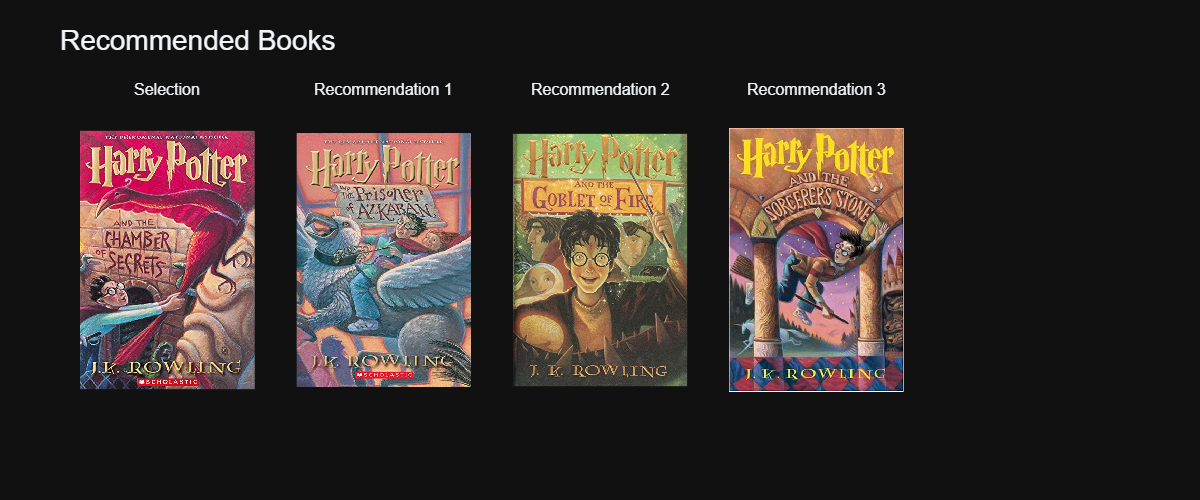


**** CHOOSE ONE OPTION ****
 1. Find a book recommendation based on the review score 
 0. Exit

****** END ******


In [58]:
# Program to choose recommendations
def choose_option() -> str:
    print("\n**** CHOOSE ONE OPTION ****\n",
        "1. Find a book recommendation based on the review score \n",
        "0. Exit\n")
    return input("Insert an option: ")
    
option = choose_option()
options = ['0','1']

while option != "0":
    if option not in options:
        print("Invalid option!")
        option = choose_option()
        continue

    if option == "1":
        book_user = input("Insert the name of the book (estimated) and we will find it in our database: ")
        try:
            list = book_list(book_user,matrix)
        except:
            print('This book was not found.')
            option = choose_option()
            continue
        for count,value in enumerate(list):
            print(f'{count+1}. {value}')
        book_number = int(input("Choose a book from the list: "))
        while book_number > len(list) or book_number < 1:
            print("This number is not in the list.")
            book_number = int(input("Choose a book from the list: "))

        book_final = dict(enumerate(list))[book_number-1]

        k = int(input('How many recommendations do you want? (1-4): '))
        while k > 4 or k < 1:
            print("Choose a number between 1 and 4.")
            k = int(input('How many recommendations do you want? (1-4): '))
        model = knn_model(k+1,matrix_sparse)
        recom = book_choice(book_final, matrix, model)

        show_recom(recom,df,matrix)
    
    option = choose_option()
else: print("****** END ******")